# Pattern Recognition Mini Project 1
# Part-1 Data Analysis

## TODO:

- [x] Delete bad values related to `battery_plugged`


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rv_discrete

In [ ]:
url='android.csv'
df=pd.read_csv(url)
print("Data.shape = ", df.shape)

columns = [col for col in df.columns]
print("Columns: ", columns)

Data.shape =  (2469, 72)
Columns:  ['battery_level', 'battery_plugged', 'battery_status', 'day', 'month', 'packages_running_android', 'packages_running_ch.smalltech.battery.free', 'packages_running_com.android.bluetooth', 'packages_running_com.android.calculator2', 'packages_running_com.android.chrome', 'packages_running_com.android.contacts', 'packages_running_com.android.defcontainer', 'packages_running_com.android.keychain', 'packages_running_com.android.launcher', 'packages_running_com.android.mms', 'packages_running_com.android.musicfx', 'packages_running_com.android.nfc', 'packages_running_com.android.noisefield', 'packages_running_com.android.packageinstaller', 'packages_running_com.android.phone', 'packages_running_com.android.providers.applications', 'packages_running_com.android.providers.calendar', 'packages_running_com.android.providers.contacts', 'packages_running_com.android.providers.downloads', 'packages_running_com.android.providers.drm', 'packages_running_com.android.

## Of what data type are the features?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469 entries, 0 to 2468
Data columns (total 72 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   battery_level                                                         2468 non-null   float64
 1   battery_plugged                                                       2468 non-null   float64
 2   battery_status                                                        2468 non-null   float64
 3   day                                                                   2468 non-null   float64
 4   month                                                                 2468 non-null   float64
 5   packages_running_android                                              2468 non-null   float64
 6   packages_running_ch.smalltech.battery.free                            2468 non-null   float64
 7

## Are there fields that do not contain a value or are ’NaN’?

There are no values in line 1520. Deleting the line...

In [ ]:
# Helper functions to deal with null values
def null_indices(df):
  #Returns all null indices for each attribute as a dictonary
  return {col : df[df[col].isnull()].index.tolist() for col in df.columns}

def all_null_indices(df):
  # Returns all the null_indices in the df
  empty_index_list = []
  for col in df.columns:
    empty_index_list = df[df[col].isnull()].index.tolist() + (empty_index_list)
  return list(set(empty_index_list))


#Observe the null data indexes
null_index = null_indices(df)
all_null_indexes = all_null_indices(df)

print("Before cleaning:")
print(null_index)
print(all_null_indexes)

#NULL data removed
df = df.dropna()

#Check
null_index = null_indices(df)
all_null_indexes = all_null_indices(df)

print("After cleaning:")
print(null_index)
print(all_null_indexes)

Before cleaning:
{'battery_level': [1520], 'battery_plugged': [1520], 'battery_status': [1520], 'day': [1520], 'month': [1520], 'packages_running_android': [1520], 'packages_running_ch.smalltech.battery.free': [1520], 'packages_running_com.android.bluetooth': [1520], 'packages_running_com.android.calculator2': [1520], 'packages_running_com.android.chrome': [1520], 'packages_running_com.android.contacts': [1520], 'packages_running_com.android.defcontainer': [1520], 'packages_running_com.android.keychain': [1520], 'packages_running_com.android.launcher': [1520], 'packages_running_com.android.mms': [1520], 'packages_running_com.android.musicfx': [1520], 'packages_running_com.android.nfc': [1520], 'packages_running_com.android.noisefield': [1520], 'packages_running_com.android.packageinstaller': [1520], 'packages_running_com.android.phone': [1520], 'packages_running_com.android.providers.applications': [1520], 'packages_running_com.android.providers.calendar': [1520], 'packages_running_com

## Unique values exist in each column (feature)

Some values have problems:
- Intermediate values in `battery_plugged`
- Weird value for `battery_plugged`
- Intermediate values in `battery_status`
- 1970 value in `year`

In [ ]:
for col in df.columns:
    unq = df[col].unique()
    unq.sort()
    print(col, " : \n", unq, "\n")

battery_level  : 
 [-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.  16.  17.
  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.  30.] 

battery_plugged  : 
 [0.         0.5        0.66666667 0.75       1.         2.        ] 

battery_status  : 
 [0.         2.         2.33333333 2.5        2.66666667 3.
 3.5        3.66666667 4.         4.5        4.66666667 5.        ] 

day  : 
 [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31.] 

month  : 
 [ 1.  2.  3.  8.  9. 10. 11. 12.] 

packages_running_android  : 
 [0. 1.] 

packages_running_ch.smalltech.battery.free  : 
 [0. 1.] 

packages_running_com.android.bluetooth  : 
 [0. 1.] 

packages_running_com.android.calculator2  : 
 [0. 1.] 

packages_running_com.android.chrome  : 
 [0. 1.] 

packages_running_com.android.contacts  : 
 [0. 1.] 

packages_running_com.android.defc

## How often is each app running?

In [ ]:
#creating a dataframe showing frequences of app usages
app_usage_df = pd.DataFrame(columns=['app_name', "is_active", "is_passive", "frequency"])  

apps = columns[5:-2]
for app in apps:
    appUsage = df[app].value_counts().to_dict()

    is_active =  appUsage.get(1)
    is_passive = appUsage.get(0)

    if is_active==None:
        is_active=0
    if is_passive==None:
        is_passive=0

    appFreq = is_active / (is_active + is_passive)

    #print(app, "\n", appUsage, "appFreq=", appFreq ,"\n")
    app_usage_df = app_usage_df.append({'app_name':app, "is_active":is_active, "is_passive":is_passive, "frequency":appFreq}, ignore_index=True)


app_usage_df = app_usage_df.sort_values(by='frequency', ascending=False)

pd.set_option('display.max_rows', 100)
print(app_usage_df.to_string())
_=pd.reset_option('all')

                                                                app_name is_active is_passive  frequency
0                                               packages_running_android      2467          1   0.999595
45                 packages_running_com.google.android.inputmethod.latin      2467          1   0.999595
25                                      packages_running_com.android.stk      2467          1   0.999595
14                                    packages_running_com.android.phone      2467          1   0.999595
43                               packages_running_com.google.android.gsf      2467          1   0.999595
12                               packages_running_com.android.noisefield      2467          1   0.999595
11                                      packages_running_com.android.nfc      2467          1   0.999595
26                                 packages_running_com.android.systemui      2467          1   0.999595
8                                  packages_running_com

### Cleaning some columns

We can clear apps which are running `>99%` or `<1%` of the time because they are a part of OS or they don't give any information about the battery usage.

In [ ]:
#JUST FOR ANALYSING
#CLEANED FORM OF app_usage_df 

cleaned = app_usage_df.copy()
indexNames = cleaned[ cleaned['frequency'] > 0.99 ].index
cleaned.drop(indexNames , inplace=True)

indexNames = cleaned[ cleaned['frequency'] < 0.01 ].index
cleaned.drop(indexNames , inplace=True)

pd.set_option('display.max_rows', 100)
print(cleaned.to_string())
_=pd.reset_option('all')

                                                                app_name is_active is_passive  frequency
28                        packages_running_com.google.android.apps.books      2421         47   0.980956
44                         packages_running_com.google.android.gsf.login      2418         50   0.979741
47                          packages_running_com.google.android.location      2290        178   0.927877
16                       packages_running_com.android.providers.calendar      1846        622   0.747974
46  packages_running_com.google.android.inputmethod.latin.dictionarypack      1845        623   0.747569
35                          packages_running_com.google.android.calendar      1807        661   0.732172
39                         packages_running_com.google.android.gallery3d      1789        679   0.724878
1                             packages_running_ch.smalltech.battery.free      1723        745   0.698136
29            packages_running_com.google.android.apps.

In [ ]:
col_idx_to_be_deleted = app_usage_df.loc[ (app_usage_df['frequency'] > 0.99) | (app_usage_df['frequency'] < 0.01) ].index

for i in app_usage_df['app_name'][col_idx_to_be_deleted]:
    print("Column", i, "dropped! Frequency:", float(app_usage_df[ app_usage_df['app_name']==i ]['frequency']))
    df.drop(i, axis=1, inplace=True)

Column packages_running_android dropped! Frequency: 0.9995948136142626
Column packages_running_com.google.android.inputmethod.latin dropped! Frequency: 0.9995948136142626
Column packages_running_com.android.stk dropped! Frequency: 0.9995948136142626
Column packages_running_com.android.phone dropped! Frequency: 0.9995948136142626
Column packages_running_com.google.android.gsf dropped! Frequency: 0.9995948136142626
Column packages_running_com.android.noisefield dropped! Frequency: 0.9995948136142626
Column packages_running_com.android.nfc dropped! Frequency: 0.9995948136142626
Column packages_running_com.android.systemui dropped! Frequency: 0.9995948136142626
Column packages_running_com.android.launcher dropped! Frequency: 0.9995948136142626
Column packages_running_com.android.providers.settings dropped! Frequency: 0.9995948136142626
Column packages_running_com.google.android.apps.maps dropped! Frequency: 0.9995948136142626
Column packages_running_com.google.android.backup dropped! Frequ

## How often is the battery change positive / negative?

In [ ]:
#print(df['battery_level'].value_counts())

batteryLevels = df['battery_level'].value_counts().to_dict()

positiveChange = 0
negativeChange = 0
noChange = 0
for key, value in batteryLevels.items() :
    #print("key = ", key, " value: ", value)
    if key>0:
        positiveChange += value
    elif key<0:
        negativeChange += value
    else:
        noChange += value

print("Positive Change = ", positiveChange)
print("Negative Change = ", negativeChange)
print("No Change = ", noChange)

Positive Change =  135
Negative Change =  1029
No Change =  1304


#### Total Application Usage on each time slot 

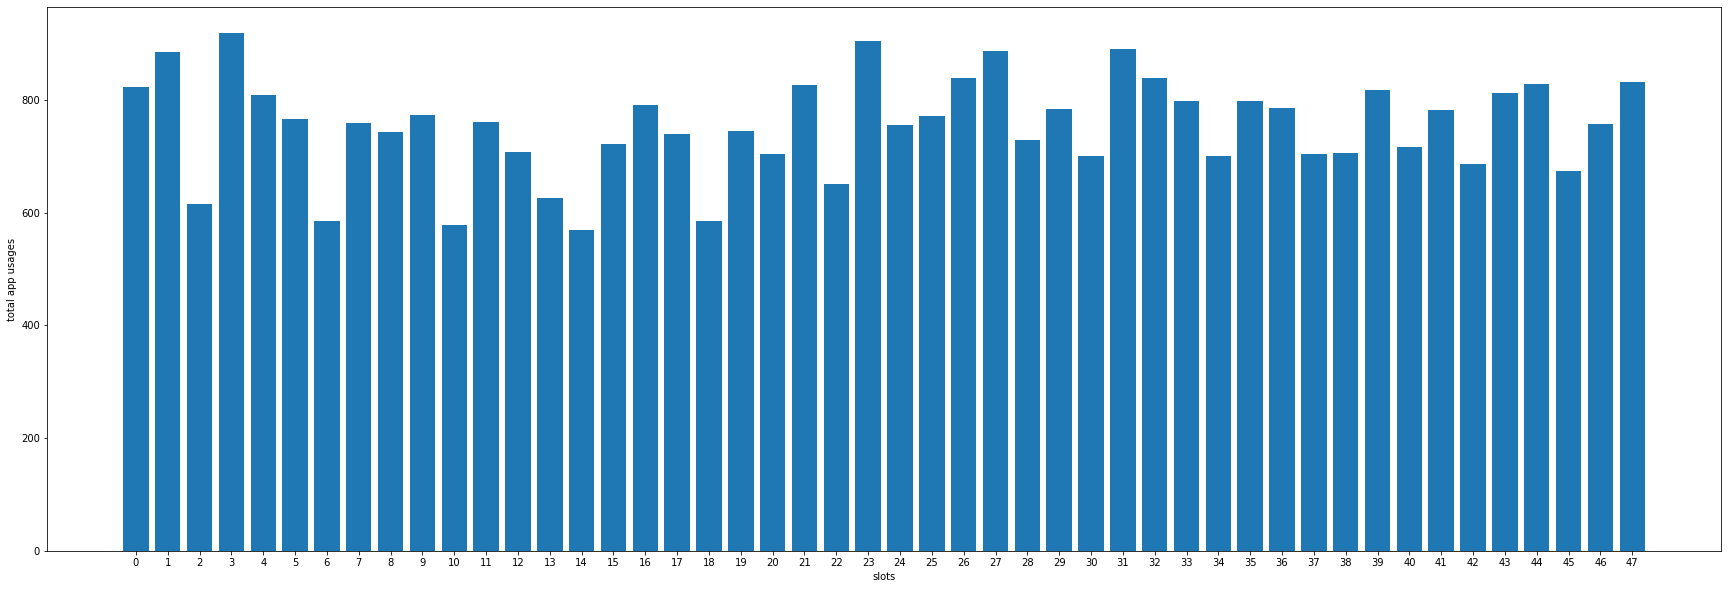

In [ ]:
def visualizingAppUsagePerTimeSlot():
    slots = df["slot"].unique()
    slots.sort()

    x_axis = slots
    y_axis = []    
    app_columns = df.columns[5:-3]  

    for key in slots:
        filter = df["slot"]==key
        filtered_df = df.where(filter)
        filtered_df = filtered_df.dropna()

        app_usage_per_slot = 0
        for app in app_columns:
            #print(app, " frequency in this time slot = ", df2[app].value_counts().to_dict().get(1))
            if filtered_df[app].value_counts().to_dict().get(1)!=None:
                app_usage_per_slot += filtered_df[app].value_counts().to_dict().get(1)

        #print("TOTAL app usage for this slot = ", app_usage_per_slot)
        y_axis.append(app_usage_per_slot)

    fig = plt.figure(figsize=(30, 10))
    ax = fig.gca()
    ax.set_xticks(x_axis)
    ax.bar(x_axis, y_axis)
    ax.set_xlabel("slots")
    ax.set_ylabel("total app usages")
    plt.show()       
    

visualizingAppUsagePerTimeSlot()

## Predictions on Battery Status
- `battery_status = 0`: No battery status & battery plugged information for that state.
- `battery_status = 1`: Never happened. Maybe the battery is dead?
- `battery_status = 2`: The battery is charging.
- `battery_status = 3`: The battery is discharging.
- `battery_status = 4`: The battery is full?
- `battery_status = 5`: The battery is NOT charging. (bad USB cable? battery is already full?)
- `2 < battery_status < 3`: User is using the phone while charging? Or user charged the phone for 15mins and used for 15mins.
- `3 < battery_status < 4`: User is using the phone while charging?
- `4 < battery_status < 5`: Charging completed early in the timeslot so it is not charging in the last minutes for the same slot?

## Analyze The Time

Year 1970 value at line 2407 is clearly  an outlier so we drop it.

In [ ]:
# Drop values with year=1970
df = df[df.year != 1970]

# Print {Year: Frequency}
counts = df['year'].value_counts().to_dict()
for k,v in counts.items():
    print("Year:", k, "Frequency:", v)

Year: 2013.0 Frequency: 1278
Year: 2012.0 Frequency: 1189


Using 3 different rows is difficult for time calculations. Let's create a time column for this task.

In [ ]:
df['time'] = pd.to_datetime(df[['year','month','day']])
print(df['time'])

0      2012-08-31
1      2012-08-31
2      2012-08-31
3      2012-08-31
4      2012-08-31
          ...    
2464   2013-03-07
2465   2013-03-07
2466   2013-03-07
2467   2013-03-07
2468   2013-03-07
Name: time, Length: 2467, dtype: datetime64[ns]


## Analyze The Battery

Look at the histogram for avg change in battery level in the both cases. It should be an error if battery level increases without battery is plugged in normal cases. But if `battery_status = 0` then (according to our assumptions) it is possible that we don't know if the battery is plugged or not.

On the other hand, `battery_plugged` feature creates a biased noise in `battery_level`, because it is difficult to measure an app's battery usage while charging.

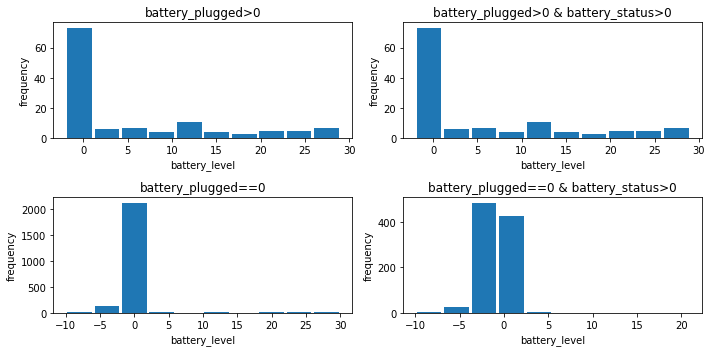

In [ ]:
battery_plugged_gt_0 = df[df['battery_plugged']>0]
battery_plugged_eq_0 = df[df['battery_plugged']==0]
battery_plugged_gt_0_fixed = df.loc[(df['battery_plugged']>0) & (df['battery_status']>0)]
battery_plugged_eq_0_fixed = df.loc[(df['battery_plugged']==0) & (df['battery_status']>0)]

fig, axs = plt.subplots(2,2, figsize=(10, 5))
axs[0,0].hist(battery_plugged_gt_0['battery_level'], rwidth=0.9)
axs[0,0].set_xlabel('battery_level')
axs[0,0].set_ylabel('frequency')
axs[0,0].set_title('battery_plugged>0')
axs[1,0].hist(battery_plugged_eq_0['battery_level'], rwidth=0.9)
axs[1,0].set_xlabel('battery_level')
axs[1,0].set_ylabel('frequency')
axs[1,0].set_title('battery_plugged==0')
axs[0,1].hist(battery_plugged_gt_0_fixed['battery_level'], rwidth=0.9)
axs[0,1].set_xlabel('battery_level')
axs[0,1].set_ylabel('frequency')
axs[0,1].set_title('battery_plugged>0 & battery_status>0')
axs[1,1].hist(battery_plugged_eq_0_fixed['battery_level'], rwidth=0.9)
axs[1,1].set_xlabel('battery_level')
axs[1,1].set_ylabel('frequency')
axs[1,1].set_title('battery_plugged==0 & battery_status>0')
fig.tight_layout()

Our model should predict battery usage between two different time points. Predicting charging times would be confusing to user, since users can go outside of their habits (like going to musical, concert, party etc. after work). In this viewpoint, telling to user that the phone's battery will run out at 01.00 assuming the user will charge the phone before leaving the work would be problematic. 

According to our assumptions, values 2, 4, 5 are charging status of the battery. In addition to that, if the battery is plugged the phone should be charging, so feeding these data to our model would make the model predict that some app's behaviour are not consuming the battery.

And lastly for the charging case, it is needed that if the battery level goes up the battery is charging actually. So we should clean those columns too.

After these drops, `battery_status` and `battery_plugged` columns will not include significant information, so we can drop those.

The rows with faulty battery status or in which battery_plugged is true, is useful for prediction of user profile.

So we save this in another dataframe and use this to train our Markov Chain Model

In [ ]:
df_state_prediction = df.drop(columns = ['battery_status','battery_plugged'])
df_state_prediction.to_csv('state_prediction.csv', index=False)


In [ ]:
# clean charging data
charging_data_idx = df.loc[(df['battery_plugged']==1) | (df['battery_status']==2) | (df['battery_status']>=4) | (df['battery_level']>0)].index
print("[Charging Data]: Rows to be deleted:", len(charging_data_idx))
df = df.drop(charging_data_idx)

# after this cleaning battery_status and battery_plugged will be meaningless
df = df.drop('battery_status', 1)
df = df.drop('battery_plugged', 1)

[Charging Data]: Rows to be deleted: 209


## Save the Clean Dataframe

In [ ]:
df.to_csv('clean_android.csv', index=False)

In [ ]:
#pd.set_option('display.max_columns', None) 
#print("SUM OF NULLS: ", df.isnull().sum(), " --- \n\n")
#print(df.isnull())
#print(df.loc[1520,:])